<a href="https://colab.research.google.com/github/chetya17/ML-Lab-Codes/blob/main/ML_Lab_6_Logistic_Regression_for_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [3]:
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

In [6]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

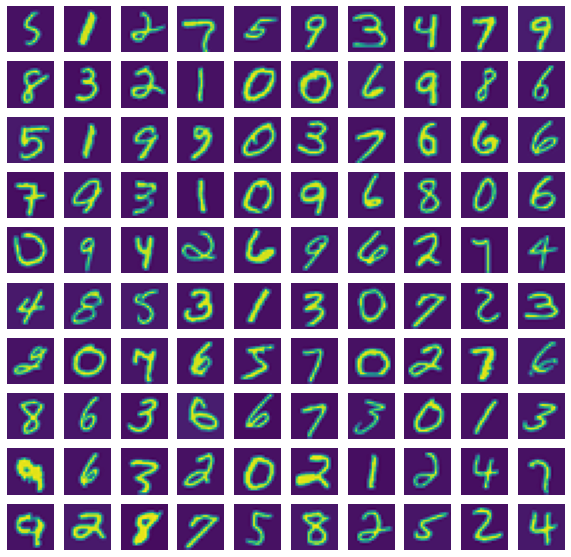

In [4]:
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off') 

In [5]:
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X)) #add the intercept
(m,n) = X.shape

In [7]:
import numpy as np
import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = 0
tic = time.time()
for i in range(1000000):
  c += a[i] * b[i]
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using for-loop " + str(1000*(toc-tic)) + " ms")
c = 0
tic = time.time()
c = np.dot(a,b) # no for-loops in vectorized version
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using vectorized operation " + str(1000*(toc-tic)) + " ms")

value of c 249837.82016
time taken using for-loop 378.3988952636719 ms
value of c 249837.82016
time taken using vectorized operation 2.350330352783203 ms


In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [10]:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [11]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.009109
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.014082
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.056188
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061955
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037407
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063610
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.020031
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033839
      

In [12]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.1